<a href="https://colab.research.google.com/github/hannz0/Data-Analyst-Bookstore/blob/main/data_analyst_midterm_G3_bookstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
!pip install --upgrade gspread

In [ ]:
from google.colab import drive, auth
auth.authenticate_user()
import pandas as pd
import gspread as gs
import numpy as np
from oauth2client.client import GoogleCredentials
from google.auth import default

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preparation

**Bookstore Data**

Objective: Analyze the bookstore data, provide policies that should be implemented to optimize the results.

In [ ]:
creds,_ = default()

gc = gs.authorize(creds)

wb = gc.open_by_key('1MLAKNV6xdHSDoOhKrIr1wHAxJZ8LG-6M2zimTCSBVZU')

In [ ]:
jenisBukusheet = wb.worksheet("JenisBuku")
tipePembacasheet = wb.worksheet("TipePembaca")
bukusheet = wb.worksheet("Buku")
penjualansheet = wb.worksheet("Penjualan")

In [ ]:
jenisbuku = jenisBukusheet.get_all_values()
df_jenis = pd.DataFrame.from_records(jenisbuku[1:], columns=jenisbuku[0])
df_jenis

,id_jenis,Jenis Buku
0,J01,Novel
1,J02,Tafsir
2,J03,Majalah
3,J04,Dongeng
4,J05,Karya Ilmiah
5,J06,Komik
6,J07,Antologi
7,J08,Ensiklopedi
8,J09,Buku Ilmiah


In [ ]:
tipembaca = tipePembacasheet.get_all_values()
df_tipe = pd.DataFrame.from_records(tipembaca[1:], columns=tipembaca[0])
df_tipe

,id_tipe,tipe pembaca
0,T01,Serius
1,T02,Biasa
2,T03,Ragu-Ragu
3,T04,Santai


In [ ]:
buku = bukusheet.get_all_values()
df_buku = pd.DataFrame.from_records(buku[1:], columns=buku[0])
df_buku

,id_buku,id_tipe,id_jenis,halaman,bahasa,harga,jumlah tercetak,jumlah penulis
0,B01,T01,J01,223,german,254643,2,7
1,B02,T02,J02,52,indonesia,1395002,5,6
2,B03,T03,J04,72,arab,510308,2,3
3,B04,T03,J02,182,inggris,1441300,2,3
4,B05,T01,J04,190,inggris,241248,3,10
...,...,...,...,...,...,...,...,...
295,B296,T02,J03,364,arab,407833,1,2
296,B297,T03,J06,142,inggris,240893,3,7
297,B298,T04,J05,182,korea,1025103,3,5
298,B299,T01,J04,101,korea,779918,2,6


In [ ]:
penjualan = penjualansheet.get_all_values()
df_penjualan = pd.DataFrame.from_records(penjualan[1:], columns=penjualan[0])
df_penjualan

,id_penjualan,id_buku,jumlah buku,terjual online,terjual offline
0,P01,B01,171,68,103
1,P02,B02,561,224,337
2,P03,B03,287,115,172
3,P04,B04,223,89,134
4,P05,B05,703,281,422
...,...,...,...,...,...
295,P296,B296,737,295,442
296,P297,B297,944,378,566
297,P298,B298,118,47,71
298,P299,B299,271,108,163


##Change Columns Name

In [ ]:
df_jenis = df_jenis.rename(columns={'Jenis Buku': 'jenis_buku'})
df_buku = df_buku.rename(columns={'jumlah tercetak': 'jumlah_tercetak','jumlah penulis':'jumlah_penulis'})
df_tipe = df_tipe.rename(columns={'tipe pembaca': 'tipe_pembaca'})
df_penjualan = df_penjualan.rename(columns={'jumlah buku': 'jumlah_buku','terjual online':'terjual_online', 'terjual offline':'terjual_offline'})

In [ ]:
df1 = pd.merge(df_jenis, df_buku)
df1

,id_jenis,jenis_buku,id_buku,id_tipe,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis
0,J01,Novel,B01,T01,223,german,254643,2,7
1,J01,Novel,B12,T04,396,inggris,792951,5,6
2,J01,Novel,B15,T04,91,german,752282,4,5
3,J01,Novel,B33,T01,408,korea,960261,3,7
4,J01,Novel,B36,T03,155,inggris,1130616,5,9
...,...,...,...,...,...,...,...,...,...
295,J09,Buku Ilmiah,B256,T03,170,japan,351126,3,9
296,J09,Buku Ilmiah,B262,T03,189,indonesia,58170,2,10
297,J09,Buku Ilmiah,B281,T02,487,arab,601873,1,6
298,J09,Buku Ilmiah,B291,T04,173,inggris,1251165,1,5


In [ ]:
df2 = pd.merge(df1, df_tipe)
df2

,id_jenis,jenis_buku,id_buku,id_tipe,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis,tipe_pembaca
0,J01,Novel,B01,T01,223,german,254643,2,7,Serius
1,J01,Novel,B33,T01,408,korea,960261,3,7,Serius
2,J01,Novel,B39,T01,236,arab,379135,5,7,Serius
3,J01,Novel,B48,T01,388,korea,949506,2,7,Serius
4,J01,Novel,B65,T01,352,german,585896,4,6,Serius
...,...,...,...,...,...,...,...,...,...,...
295,J09,Buku Ilmiah,B80,T02,488,japan,195590,5,10,Biasa
296,J09,Buku Ilmiah,B86,T02,381,german,734876,3,1,Biasa
297,J09,Buku Ilmiah,B89,T02,244,arab,1474118,5,9,Biasa
298,J09,Buku Ilmiah,B201,T02,172,korea,734527,4,4,Biasa


In [ ]:
dfAll = pd.merge(df2, df_penjualan)

In [ ]:
df_buku.describe()

,id_buku,id_tipe,id_jenis,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis
count,300,300,300,300,300,300,300,300
unique,300,4,9,221,6,280,5,10
top,B01,T04,J04,411,arab,351126,3,10
freq,1,88,44,4,56,2,68,36


In [ ]:
df_buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_buku          300 non-null    object
 1   id_tipe          300 non-null    object
 2   id_jenis         300 non-null    object
 3   halaman          300 non-null    object
 4   bahasa           300 non-null    object
 5   harga            300 non-null    object
 6   jumlah_tercetak  300 non-null    object
 7   jumlah_penulis   300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [ ]:
df_buku.get(['id_buku', 'harga'])

,id_buku,harga
0,B01,254643
1,B02,1395002
2,B03,510308
3,B04,1441300
4,B05,241248
...,...,...
295,B296,407833
296,B297,240893
297,B298,1025103
298,B299,779918


##Change Data Type

In [ ]:
df_jenis.info()
df_tipe.info()
df_buku.info()
df_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_jenis    9 non-null      object
 1   jenis_buku  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_tipe       4 non-null      object
 1   tipe_pembaca  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_buku          300 non-null    object
 1   id_tipe          300 non-null    object
 2   id_jenis         300 non-null    object
 3   halaman          300 non-null    object
 4   bah

In [ ]:
##Change data type jenis buku
df_jenis['id_jenis'] = df_jenis['id_jenis'].astype('str')
df_jenis['jenis_buku'] = df_jenis['jenis_buku'].astype('str')

##Change data type tipe pembaca
df_tipe['id_tipe'] = df_tipe['id_tipe'].astype('str')
df_tipe['tipe_pembaca'] = df_tipe['tipe_pembaca'].astype('str')

##Change data type buku
df_buku['id_buku'] = df_buku['id_buku'].astype('str')
df_buku['id_tipe'] = df_buku['id_tipe'].astype('str')
df_buku['id_jenis'] = df_buku['id_jenis'].astype('str')
df_buku['halaman'] = df_buku['halaman'].astype('int')
df_buku['bahasa'] = df_buku['bahasa'].astype('str')
df_buku['harga'] = df_buku['harga'].astype('int')
df_buku['jumlah_tercetak'] = df_buku['jumlah_tercetak'].astype('int')
df_buku['jumlah_penulis'] = df_buku['jumlah_penulis'].astype('int')

##Change data type jenis penjualan
df_penjualan['id_penjualan'] = df_penjualan['id_penjualan'].astype('str')
df_penjualan['id_buku'] = df_penjualan['id_buku'].astype('str')
df_penjualan['jumlah_buku'] = df_penjualan['jumlah_buku'].astype('int')
df_penjualan['terjual_online'] = df_penjualan['terjual_online'].astype('int')
df_penjualan['terjual_offline'] = df_penjualan['terjual_offline'].astype('int')

df_jenis.info()
df_tipe.info()
df_buku.info()
df_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_jenis    9 non-null      object
 1   jenis_buku  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_tipe       4 non-null      object
 1   tipe_pembaca  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_buku          300 non-null    object
 1   id_tipe          300 non-null    object
 2   id_jenis         300 non-null    object
 3   halaman          300 non-null    int64 
 4   bah

In [ ]:
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_jenis         300 non-null    object
 1   jenis_buku       300 non-null    object
 2   id_buku          300 non-null    object
 3   id_tipe          300 non-null    object
 4   halaman          300 non-null    object
 5   bahasa           300 non-null    object
 6   harga            300 non-null    object
 7   jumlah_tercetak  300 non-null    object
 8   jumlah_penulis   300 non-null    object
 9   tipe_pembaca     300 non-null    object
 10  id_penjualan     300 non-null    object
 11  jumlah_buku      300 non-null    object
 12  terjual_online   300 non-null    object
 13  terjual_offline  300 non-null    object
dtypes: object(14)
memory usage: 35.2+ KB


In [ ]:
dfAll['jenis_buku'] = dfAll['jenis_buku'].astype('str')
dfAll['halaman'] = dfAll['halaman'].astype('int')
dfAll['bahasa'] = dfAll['bahasa'].astype('str')
dfAll['harga'] = dfAll['harga'].astype('int')
dfAll['jumlah_tercetak'] = dfAll['jumlah_tercetak'].astype('int')
dfAll['jumlah_penulis'] = dfAll['jumlah_penulis'].astype('int')
dfAll['tipe_pembaca'] = dfAll['tipe_pembaca'].astype('str')
dfAll['jumlah_buku'] = dfAll['jumlah_buku'].astype('int')
dfAll['terjual_online'] = dfAll['terjual_online'].astype('int')
dfAll['terjual_offline'] = dfAll['terjual_offline'].astype('int')

dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_jenis         300 non-null    object
 1   jenis_buku       300 non-null    object
 2   id_buku          300 non-null    object
 3   id_tipe          300 non-null    object
 4   halaman          300 non-null    int64 
 5   bahasa           300 non-null    object
 6   harga            300 non-null    int64 
 7   jumlah_tercetak  300 non-null    int64 
 8   jumlah_penulis   300 non-null    int64 
 9   tipe_pembaca     300 non-null    object
 10  id_penjualan     300 non-null    object
 11  jumlah_buku      300 non-null    int64 
 12  terjual_online   300 non-null    int64 
 13  terjual_offline  300 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 35.2+ KB


#Data Analyst

##Data Quality Checking

###Load Data

Data Jenis Buku

In [ ]:
df_jenis

,id_jenis,jenis_buku
0,J01,Novel
1,J02,Tafsir
2,J03,Majalah
3,J04,Dongeng
4,J05,Karya Ilmiah
5,J06,Komik
6,J07,Antologi
7,J08,Ensiklopedi
8,J09,Buku Ilmiah


In [ ]:
df_jenis.shape

(9, 2)

Data Tipe Pembaca

In [ ]:
df_tipe

,id_tipe,tipe_pembaca
0,T01,Serius
1,T02,Biasa
2,T03,Ragu-Ragu
3,T04,Santai


In [ ]:
df_tipe.shape

(4, 2)

Data Buku

In [ ]:
df_buku.head(10)

,id_buku,id_tipe,id_jenis,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis
0,B01,T01,J01,223,german,254643,2,7
1,B02,T02,J02,52,indonesia,1395002,5,6
2,B03,T03,J04,72,arab,510308,2,3
3,B04,T03,J02,182,inggris,1441300,2,3
4,B05,T01,J04,190,inggris,241248,3,10
5,B06,T04,J03,330,german,939475,4,5
6,B07,T02,J08,500,arab,1121426,5,6
7,B08,T04,J04,81,indonesia,507993,2,9
8,B09,T03,J05,151,german,779733,2,1
9,B10,T04,J04,52,korea,787575,1,6


In [ ]:
df_buku.shape

(300, 8)

Data Penjualan

In [ ]:
df_penjualan.head(10)

,id_penjualan,id_buku,jumlah_buku,terjual_online,terjual_offline
0,P01,B01,171,68,103
1,P02,B02,561,224,337
2,P03,B03,287,115,172
3,P04,B04,223,89,134
4,P05,B05,703,281,422
5,P06,B06,893,357,536
6,P07,B07,403,161,242
7,P08,B08,691,276,415
8,P09,B09,525,210,315
9,P10,B10,145,58,87


In [ ]:
df_penjualan.shape

(300, 5)

Data keseluruhan

In [ ]:
dfAll.head(10)

,id_jenis,jenis_buku,id_buku,id_tipe,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis,tipe_pembaca,id_penjualan,jumlah_buku,terjual_online,terjual_offline
0,J01,Novel,B01,T01,223,german,254643,2,7,Serius,P01,171,68,103
1,J01,Novel,B33,T01,408,korea,960261,3,7,Serius,P33,203,81,122
2,J01,Novel,B39,T01,236,arab,379135,5,7,Serius,P39,281,112,169
3,J01,Novel,B48,T01,388,korea,949506,2,7,Serius,P48,165,66,99
4,J01,Novel,B65,T01,352,german,585896,4,6,Serius,P65,434,174,260
5,J01,Novel,B130,T01,411,indonesia,545386,2,5,Serius,P130,357,143,214
6,J01,Novel,B166,T01,365,german,1054804,4,1,Serius,P166,43,17,26
7,J01,Novel,B239,T01,329,korea,1157201,5,10,Serius,P239,308,123,185
8,J01,Novel,B257,T01,397,german,916392,5,2,Serius,P257,373,149,224
9,J01,Novel,B290,T01,268,german,1031808,2,1,Serius,P290,208,83,125


In [ ]:
dfAll.shape

(300, 14)

In [ ]:
dfAll.columns

Index(['id_jenis', 'jenis_buku', 'id_buku', 'id_tipe', 'halaman', 'bahasa',
       'harga', 'jumlah_tercetak', 'jumlah_penulis', 'tipe_pembaca',
       'id_penjualan', 'jumlah_buku', 'terjual_online', 'terjual_offline'],
      dtype='object')

In [ ]:
dfAll = dfAll.drop(['id_jenis','id_buku','id_tipe','id_penjualan'], axis=1)
dfAll.head()

,jenis_buku,halaman,bahasa,harga,jumlah_tercetak,jumlah_penulis,tipe_pembaca,jumlah_buku,terjual_online,terjual_offline
0,Novel,223,german,254643,2,7,Serius,171,68,103
1,Novel,408,korea,960261,3,7,Serius,203,81,122
2,Novel,236,arab,379135,5,7,Serius,281,112,169
3,Novel,388,korea,949506,2,7,Serius,165,66,99
4,Novel,352,german,585896,4,6,Serius,434,174,260


###Check Missing Value & Duplicate Data

Data Jenis Buku

In [ ]:
df_jenis.isnull().sum()

id_jenis      0
jenis_buku    0
dtype: int64

In [ ]:
df_jenis[df_jenis.duplicated()].sum()

id_jenis      0.0
jenis_buku    0.0
dtype: float64

Tipe Pembaca

In [ ]:
df_tipe.isnull().sum()

id_tipe         0
tipe_pembaca    0
dtype: int64

In [ ]:
df_tipe[df_tipe.duplicated()].sum()

id_tipe         0.0
tipe_pembaca    0.0
dtype: float64

Buku

In [ ]:
df_buku.isnull().sum()

id_buku            0
id_tipe            0
id_jenis           0
halaman            0
bahasa             0
harga              0
jumlah_tercetak    0
jumlah_penulis     0
dtype: int64

In [ ]:
df_buku[df_buku.duplicated()].sum()

id_buku            0.0
id_tipe            0.0
id_jenis           0.0
halaman            0.0
bahasa             0.0
harga              0.0
jumlah_tercetak    0.0
jumlah_penulis     0.0
dtype: float64

Penjualan

In [ ]:
df_penjualan.isnull().sum()

id_penjualan       0
id_buku            0
jumlah_buku        0
terjual_online     0
terjual_offline    0
dtype: int64

In [ ]:
df_penjualan[df_penjualan.duplicated()].sum()

id_penjualan       0.0
id_buku            0.0
jumlah_buku        0.0
terjual_online     0.0
terjual_offline    0.0
dtype: float64

In [ ]:
dfAll.isnull().sum()

jenis_buku         0
halaman            0
bahasa             0
harga              0
jumlah_tercetak    0
jumlah_penulis     0
tipe_pembaca       0
jumlah_buku        0
terjual_online     0
terjual_offline    0
dtype: int64

In [ ]:
dfAll[dfAll.duplicated()].sum()

jenis_buku         0.0
halaman            0.0
bahasa             0.0
harga              0.0
jumlah_tercetak    0.0
jumlah_penulis     0.0
tipe_pembaca       0.0
jumlah_buku        0.0
terjual_online     0.0
terjual_offline    0.0
dtype: float64

##Data Visualization

In [ ]:
print(dfAll.columns)
print('\nTotal data:',dfAll.shape[0])

Index(['jenis_buku', 'halaman', 'bahasa', 'harga', 'jumlah_tercetak',
       'jumlah_penulis', 'tipe_pembaca', 'jumlah_buku', 'terjual_online',
       'terjual_offline'],
      dtype='object')

Total data: 300


###Statistics Summary

####Numerical

In [ ]:
dfAll.describe().round()

,halaman,harga,jumlah_tercetak,jumlah_penulis,jumlah_buku,terjual_online,terjual_offline
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,285.0,784926.0,3.0,5.0,482.0,193.0,289.0
std,126.0,417308.0,1.0,3.0,279.0,112.0,168.0
min,51.0,53887.0,1.0,1.0,2.0,1.0,1.0
25%,175.0,448673.0,2.0,3.0,240.0,96.0,144.0
50%,288.0,788238.0,3.0,5.0,458.0,184.0,275.0
75%,390.0,1151872.0,4.0,8.0,706.0,282.0,424.0
max,500.0,1491821.0,5.0,10.0,998.0,399.0,599.0


####Categorical

In [ ]:
dfAll.describe(include='O')

,jenis_buku,bahasa,tipe_pembaca
count,300,300,300
unique,9,6,4
top,Dongeng,arab,Santai
freq,44,56,88


###Ploting

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
# my_palet = ['#4f8028','#77c03c','#9eff4f','#66e041','#6fab68','#61e297','#80b8be','#b5d5c2','#88a092']

custom_palet = sns.color_palette("plasma", n_colors=10)
sns.set_theme(style="whitegrid", context="talk", palette = custom_palet)

In [ ]:
jenisBuku = dfAll["jenis_buku"].value_counts()
print(jenisBuku)

Dongeng         44
Antologi        38
Majalah         35
Ensiklopedi     35
Novel           33
Karya Ilmiah    32
Tafsir          30
Buku Ilmiah     28
Komik           25
Name: jenis_buku, dtype: int64


In [ ]:
len(dfAll["jenis_buku"].values)

300

In [ ]:
dfcountJenisbuku = pd.DataFrame(jenisBuku, index= list(jenisBuku.index))
dfcountJenisbuku.reset_index(inplace=True)
dfcountJenisbuku.columns = ['jenis_buku','jumlah']

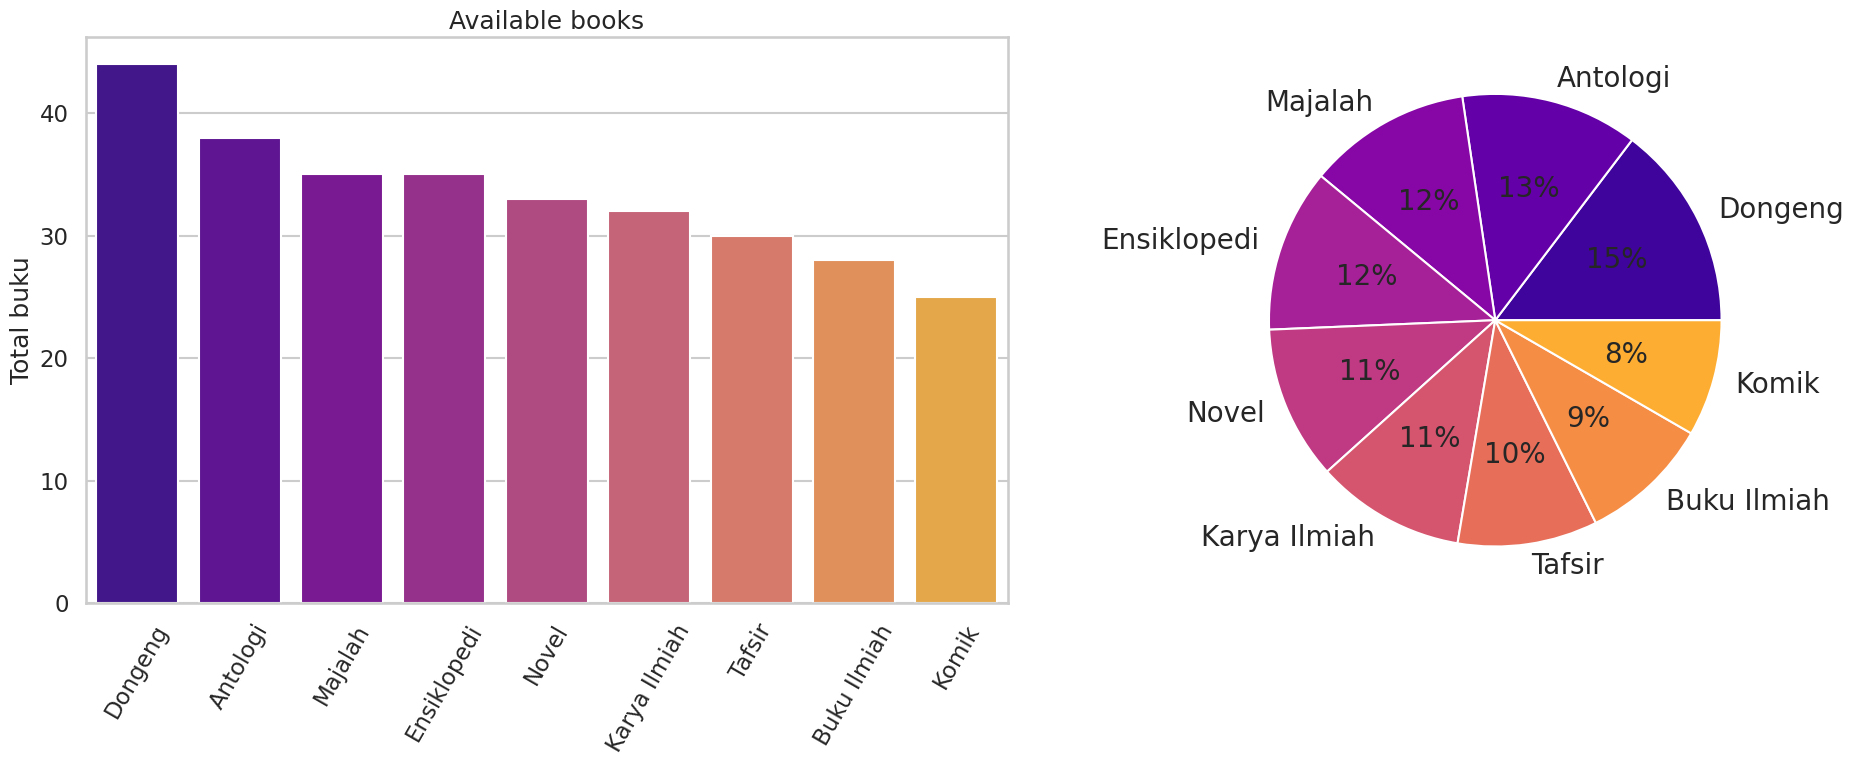

In [ ]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='jenis_buku', order= list(jenisBuku.index), data=dfAll)
plt.title('Available books', fontsize=18)
plt.xlabel(None)
plt.ylabel('Total buku')
plt.xticks(rotation=60)
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.pie(dfcountJenisbuku['jumlah'], labels=dfcountJenisbuku['jenis_buku'], colors = custom_palet, autopct='%1.0f%%',textprops={'fontsize': 20})
plt.show();

The results of the analysis of the most types of books in the store are Dongeng books with 15% or 44 out of 300 books.

In [ ]:
bookLg = df_buku.groupby('bahasa')['jumlah_tercetak'].sum()

In [ ]:
dfLanguagebook = pd.DataFrame(bookLg, index= list(bookLg.index))
dfLanguagebook.reset_index(inplace=True)
dfLanguagebook.columns = ['bahasa','jumlah_tercetak']
dfLanguagebook

,bahasa,jumlah_tercetak
0,arab,184
1,german,163
2,indonesia,161
3,inggris,149
4,japan,140
5,korea,129


In [ ]:
labels=dfLanguagebook['bahasa']

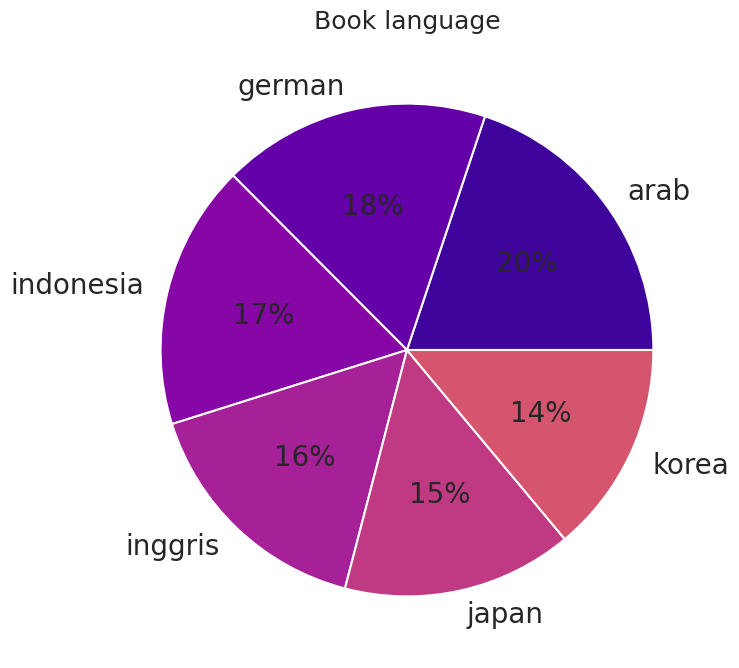

In [ ]:
plt.pie(dfLanguagebook['jumlah_tercetak'], labels=dfLanguagebook['bahasa'], colors = custom_palet, autopct='%1.0f%%',textprops={'fontsize': 20})
plt.title('Book language', fontsize=18, pad=10)
plt.show();

The number of book languages is almost equal, with Arabic books being the most widely printed

In [ ]:
dfAll['tipe_pembaca'].value_counts()

Santai       88
Serius       81
Ragu-Ragu    75
Biasa        56
Name: tipe_pembaca, dtype: int64

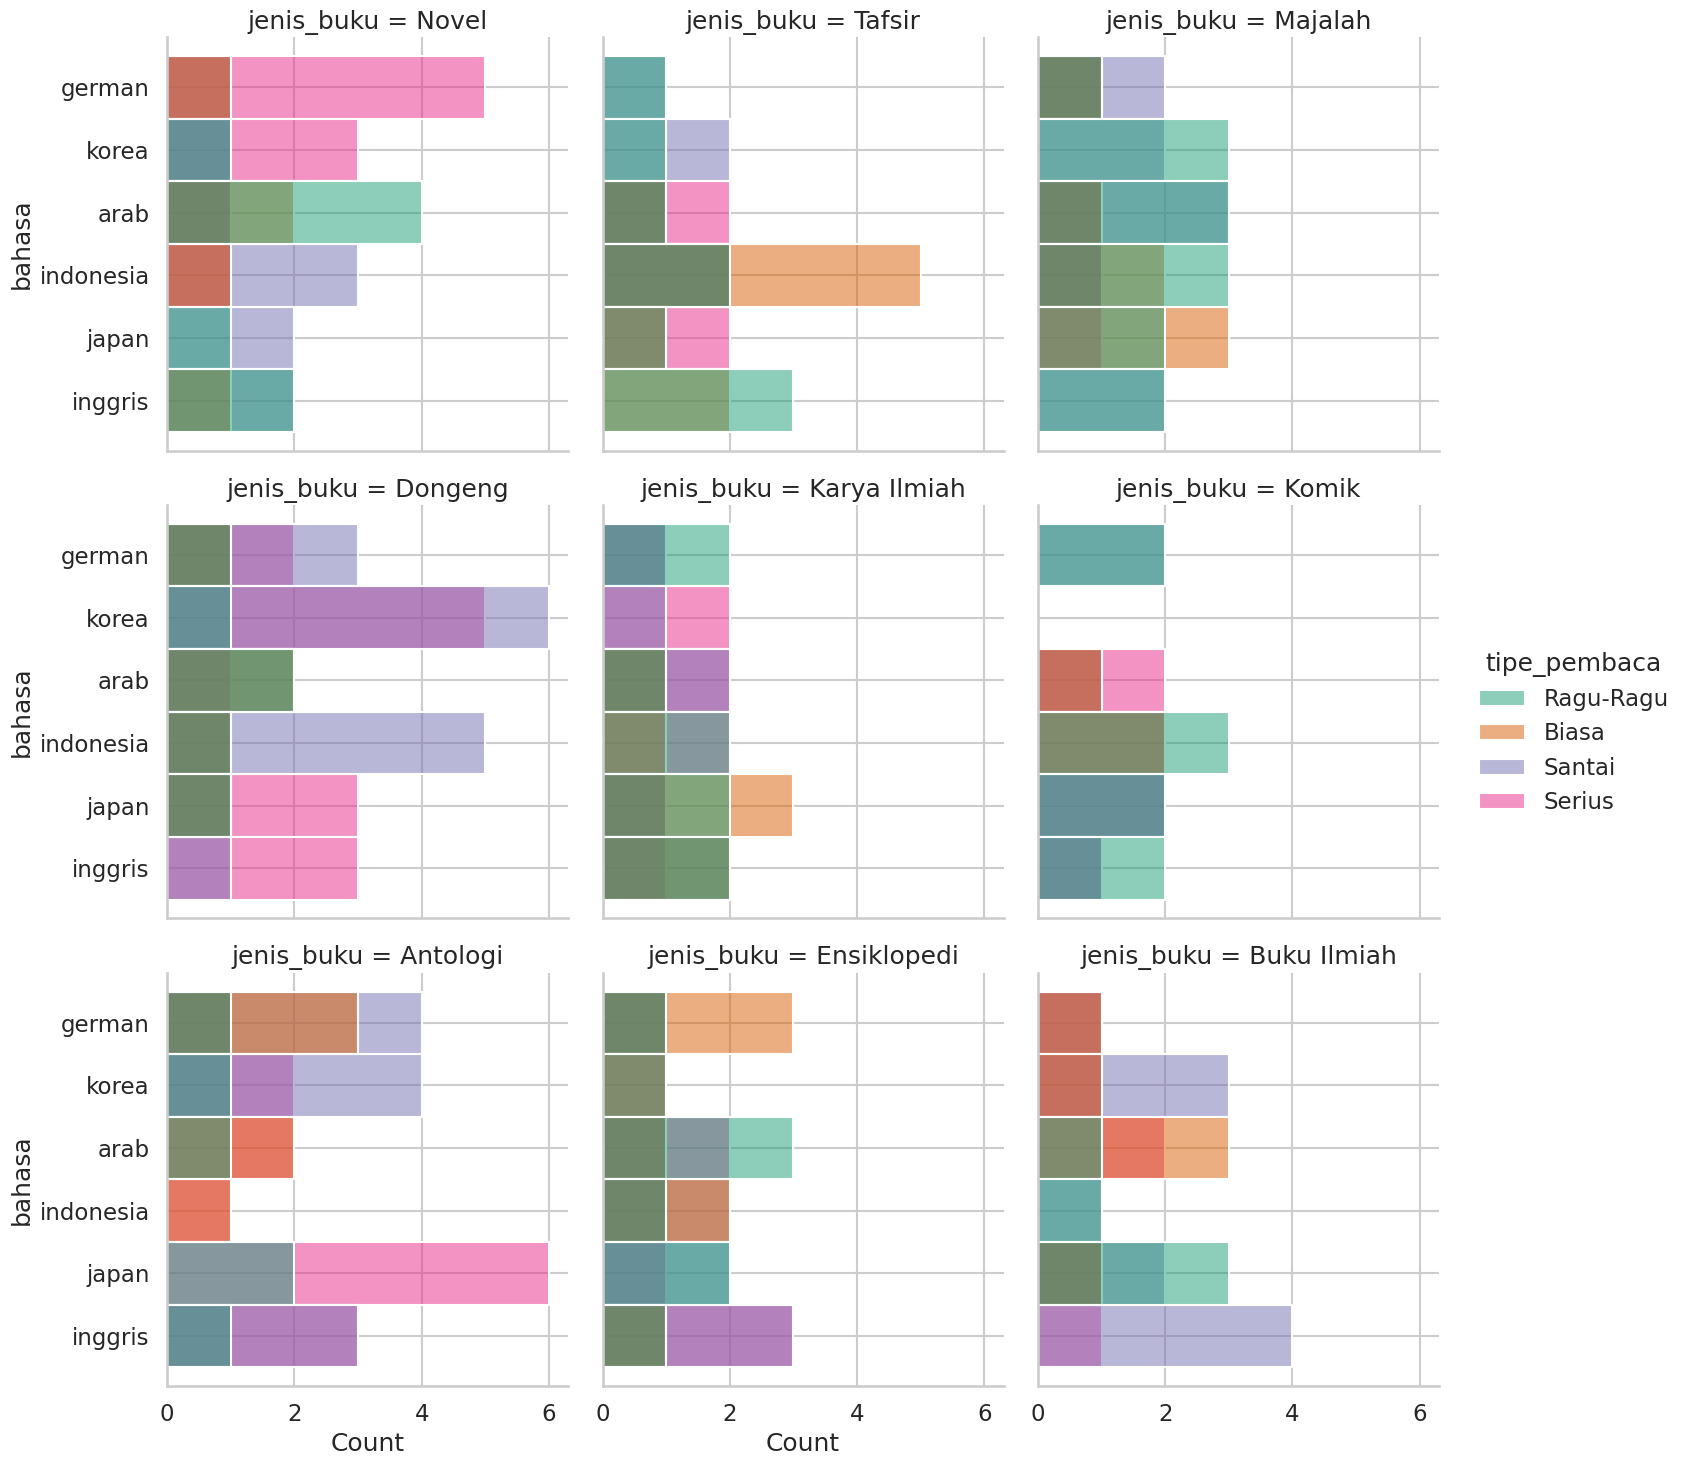

In [ ]:
sns.displot(y='bahasa', hue='tipe_pembaca', kind = 'hist',palette = 'Dark2',col='jenis_buku', col_wrap = 3, hue_order = ['Ragu-Ragu','Biasa','Santai','Serius'], data=dfAll)
plt.xlabel(None);

As a result of the analysis of readers based on language and type of book, the number of readers of each type of book with each type of reader was obtained. From the analysis, we found the types of books:

- Anthologies are most seriously read in Japan
- Novels are most read seriously in Germany
- Dongeng are the most casually read in Korea and Indonesia
- Tafsir are most casually read in Indonesia
- Novels are the most hesitantly read in Arab

In [ ]:
onlineStore = dfAll.groupby('jenis_buku')['terjual_online'].sum()

In [ ]:
onlineStore.sort_values(ascending=False)

jenis_buku
Dongeng         8830
Antologi        7579
Karya Ilmiah    6844
Ensiklopedi     6755
Majalah         6500
Tafsir          5533
Komik           5479
Novel           5413
Buku Ilmiah     4858
Name: terjual_online, dtype: int64

In [ ]:
dfOnline = pd.DataFrame(onlineStore, index= list(onlineStore.sort_values(ascending=False).index))
dfOnline.reset_index(inplace=True)
dfOnline.columns = ['jenis_buku','terjual_online']
dfOnline

,jenis_buku,terjual_online
0,Dongeng,8830
1,Antologi,7579
2,Karya Ilmiah,6844
3,Ensiklopedi,6755
4,Majalah,6500
5,Tafsir,5533
6,Komik,5479
7,Novel,5413
8,Buku Ilmiah,4858


In [ ]:
offlineStore = dfAll.groupby('jenis_buku')['terjual_offline'].sum()

In [ ]:
offlineStore.sort_values(ascending=False)

jenis_buku
Dongeng         13238
Antologi        11369
Karya Ilmiah    10264
Ensiklopedi     10139
Majalah          9756
Tafsir           8299
Komik            8220
Novel            8126
Buku Ilmiah      7291
Name: terjual_offline, dtype: int64

In [ ]:
dfOffline = pd.DataFrame(offlineStore, index = list(offlineStore.sort_values(ascending=False).index))
dfOffline.reset_index(inplace=True)
dfOffline.columns = ['jenis_buku','terjual_offline']
print(dfOffline)

     jenis_buku  terjual_offline
0       Dongeng            13238
1      Antologi            11369
2  Karya Ilmiah            10264
3   Ensiklopedi            10139
4       Majalah             9756
5        Tafsir             8299
6         Komik             8220
7         Novel             8126
8   Buku Ilmiah             7291


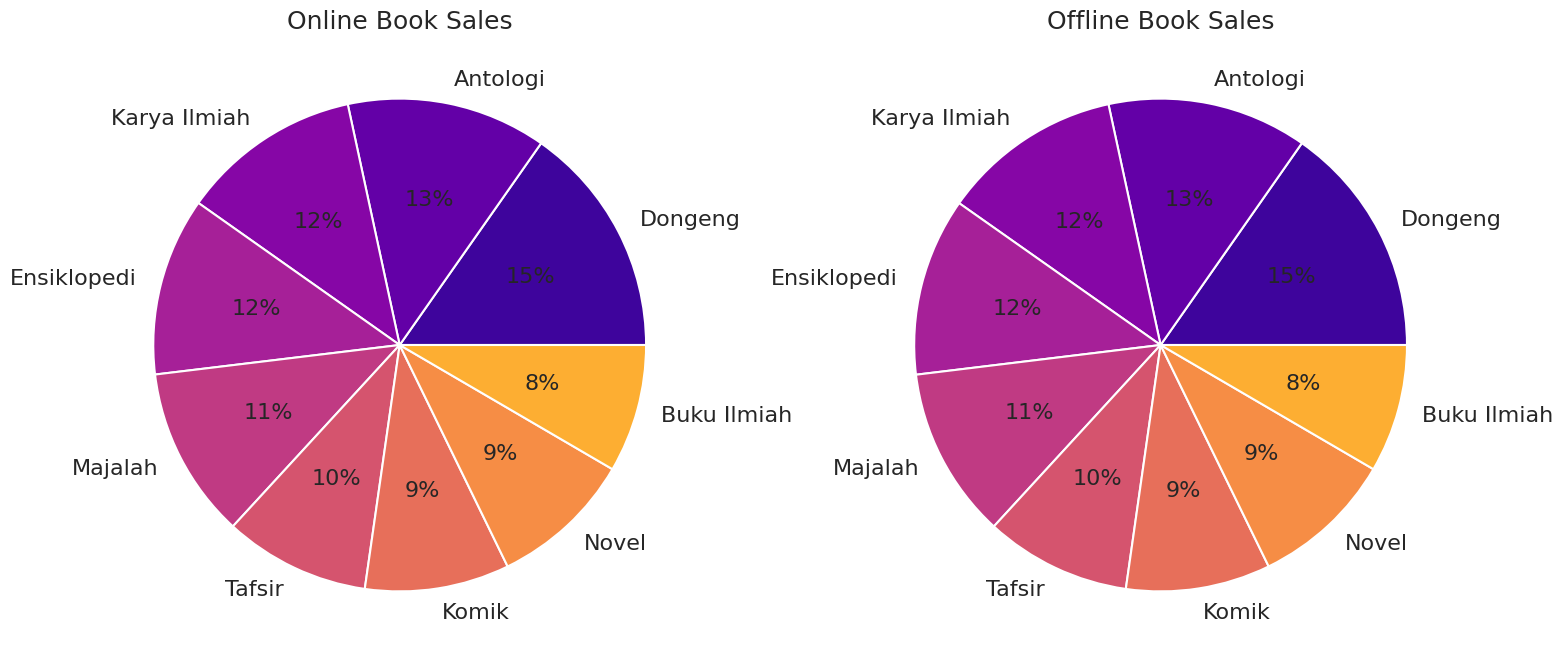

In [ ]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
plt.pie(dfOffline['terjual_offline'], labels=dfOffline['jenis_buku'], colors = custom_palet, autopct='%1.0f%%',textprops={'fontsize': 16})
plt.title('Online Book Sales', fontsize = 18)
plt.subplot(1, 2, 2)
plt.pie(dfOnline['terjual_online'], labels=dfOnline['jenis_buku'], colors = custom_palet, autopct='%1.0f%%',textprops={'fontsize': 16})
plt.title('Offline Book Sales', fontsize = 18)
plt.show();

The results of the analysis of the percentage of online and offline book sales, the type of Dongeng book sold very much with a percentage of 15%.

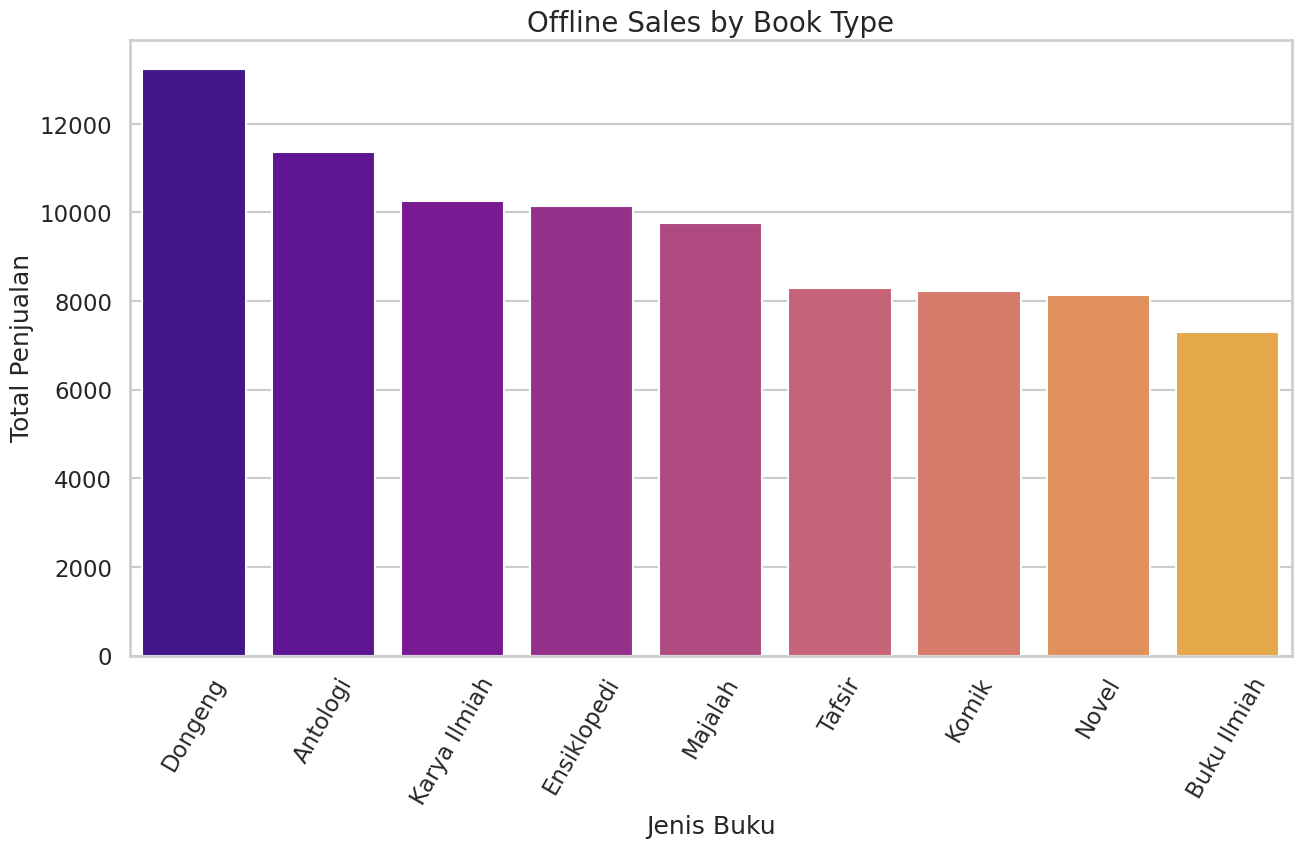

In [ ]:
sns.barplot(data=dfOffline, x="jenis_buku", y="terjual_offline")
plt.xticks(rotation=60)
plt.title("Offline Sales by Book Type", fontsize = 20)
plt.xlabel('Jenis Buku')
plt.ylabel('Total Penjualan')
plt.show();

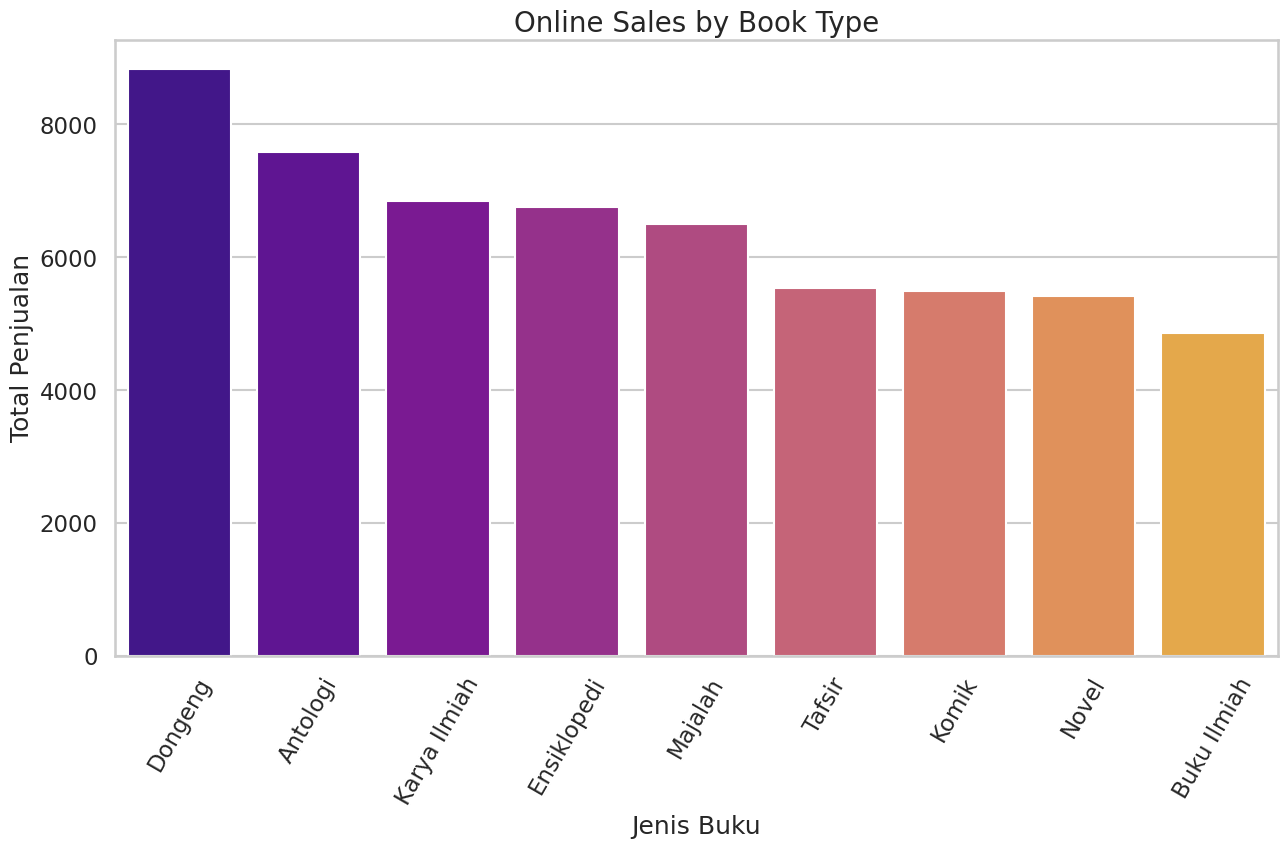

In [ ]:
sns.barplot(data=dfOnline, x='jenis_buku', y='terjual_online')
plt.xticks(rotation=60)
plt.title('Online Sales by Book Type', fontsize = 20)
plt.xlabel('Jenis Buku')
plt.ylabel('Total Penjualan')
plt.show();

In [ ]:
dfAll.groupby('jenis_buku')['harga'].agg('mean').sort_values(ascending=False)

jenis_buku
Novel           888264.909091
Ensiklopedi     854394.600000
Tafsir          841391.666667
Majalah         799120.628571
Karya Ilmiah    775740.843750
Dongeng         764860.113636
Buku Ilmiah     722753.535714
Antologi        705473.500000
Komik           701109.520000
Name: harga, dtype: float64

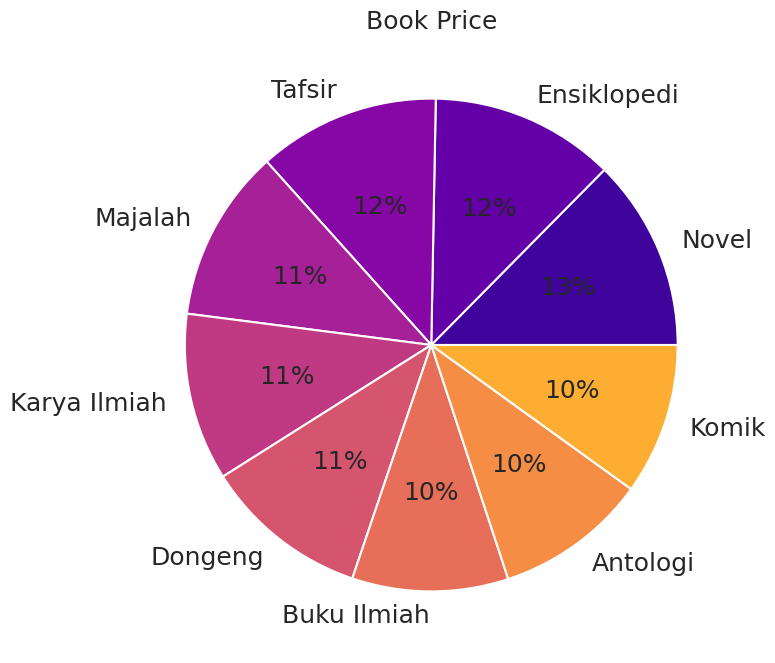

In [ ]:
plt.pie(x = dfAll.groupby('jenis_buku')['harga'].agg('mean').sort_values(ascending=False), labels=dfAll.groupby('jenis_buku')['harga'].agg('mean').sort_values(ascending=False).index, colors = custom_palet, autopct='%1.0f%%',textprops={'fontsize': 18})
plt.title('Book Price', fontsize=18 )
plt.show();

The average book price ranges from 9-12% of the total book price and novels have the highest average price.

#Policy recommendation
- Increase the collection of novels in German
- Increase the collection of anthology books in Japanese
- Increase the collection of fairy tale books in Korean and Indonesian languages
- Reduce the collection of tafsir books in Indonesian
- Reduce the collection of Arabic novels
- Reduce the price of novels
- Provide bundling or promos for literature books or reference books (Tafsir, Scientific Books, Scientific Works, Encyclopedias)
- Provide member cards according to the type of reader (marked by the rank of the card), and each rank of a certain level will get free books or discounts on book purchases.